# **Noise Reduction via Spectral Subtraction**
##### **Testing Objective: Minimize noise without jeopardizing MFCC's for model testing.**
### Procedure:
##### Take in a separate noise file and audio file of interest. 
##### Perform overlapping DFT and subtract noise file.
##### Take inverse fourier transform and save cleaned file.

In [1]:
import numpy as np
from scipy.io.wavfile import write
import os
import librosa
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as pltfrom
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# File Names for Importing and Exporting

# Set the path to the full UrbanSound dataset
root_path = Path(os.getcwd()).parent.parent # Software Folder

category = 'carhorn'

# Tested using local environment
inFile = (root_path / "Testing_Dataset" / "Same_Env" / category).with_suffix('.wav')
outFile = (root_path / "Noise_Data" / "Spectral_Sub" / category).with_suffix('.wav')
noiseFile = (root_path / "Noise_Data" / "Spectral_Sub" / "Noise").with_suffix('.wav')

In [3]:
# Load Input File and Create Noise File
audioData, sampling_rate = librosa.load(inFile, res_type = 'kaiser_fast')

# Extract noise portion and export as a file
noise = audioData[0:11025]
write(noiseFile, sampling_rate, noise)

# Import the noise via normalized librosa
noiseData, sampling_rate = librosa.load(inFile, res_type = 'kaiser_fast')

##### Windowing in Sampling 
###### Opting for Kaiser window in Short-Time Fourier Transform is proven best for noise reduction

In [4]:
# Perform Short Time Fourier Transform
stft = librosa.stft(audioData, window=('kaiser', 4)) # Chose 4 points to return in window

# Obtain Angles and Magnitude
magnitude = np.abs(stft)
phase = np.angle(stft)

# Preserve phase information in Euler form for Inverse STFT
inv_phase = np.exp(1.0j* phase)

In [5]:
# Obtain mean of noise file using STFT

# Perform Short Time Fourier Transform
stft_noise = librosa.stft(noiseData)

# Obtain Angles and Magnitude
mag_noise = np.abs(stft_noise)
mean_noise = np.mean(mag_noise, axis=1)

#### Main Operation in Spectral Substraction
##### Obtain magnitude of original file and subtract mean noise magnitude

In [6]:
# Subtraction Operation
sub_mag = magnitude - mag_noise
sub = sub_mag * inv_phase

# Convert Subtracted Signal Back to Continuous
y = librosa.istft(sub)

In [7]:
# Save ISTFT Signal as output file
write(outFile, sampling_rate, y)

#### 1. Spectrums and Spectrograms of Sound Files that Underwent Spectral Subtraction

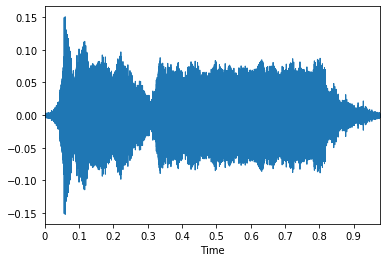

In [8]:
# Check Spectrum of Output File
outputData, sampling_rate = librosa.load(outFile)
librosa.display.waveplot(outputData, sr=sampling_rate)

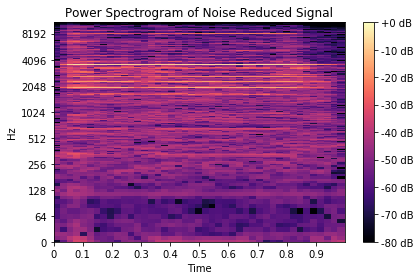

In [9]:
# Spectrogram Display
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(outputData)), ref=np.max),y_axis='log', x_axis='time')
plt.title('Power Spectrogram of Noise Reduced Signal')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

#### 2. Spectrums and Spectrograms of Sound Files Prior to Spectral Subtraction

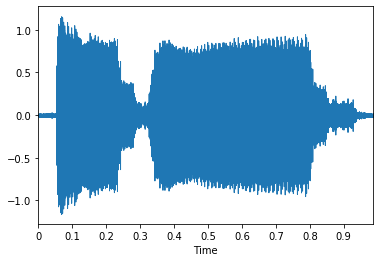

In [10]:
# Compare Spectrum of Original File Prior to Spectral Subtraction
original, sampling_rate = librosa.load(inFile)
librosa.display.waveplot(original, sr=sampling_rate)

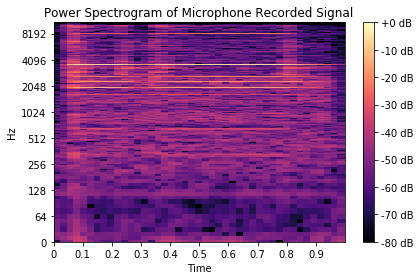

In [11]:
# Spectrogram Display
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(original)), ref=np.max),y_axis='log', x_axis='time')
plt.title('Power Spectrogram of Microphone Recorded Signal')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

#### Conclusion: The spectrograms for the original and reduced are not similar. 
#### However, the spectrograms for microphone recorded and reduced are similar.

### Next Steps? Pass through to the Model... 